In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("D:\Data Science\Data Science\Latest Data Science Material\EDA2\Datasets\iris.csv")
df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df=df.drop(['Unnamed: 0'], axis = 1)

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["label_species"]=le.fit_transform(df["Species"])

In [13]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,label_species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [14]:
x=df.drop(columns=["Species","label_species"])
y=df["label_species"]

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class="multinomial")


In [20]:
model.fit(xtrain,ytrain)

LogisticRegression(multi_class='multinomial')

In [22]:
ypred=model.predict(xtest)
ypred

array([2, 1, 2, 1, 0, 2, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0,
       0, 2, 2, 0, 0, 2, 1, 2])

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [28]:
cm=confusion_matrix(ytest,ypred)
cm

array([[11,  0,  0],
       [ 0,  5,  0],
       [ 0,  2, 12]], dtype=int64)

<AxesSubplot:>

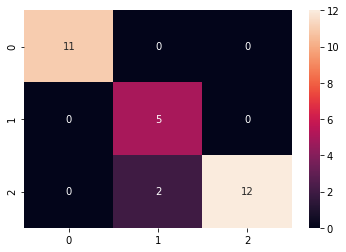

In [29]:
sns.heatmap(cm,annot=True)

In [31]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.71      1.00      0.83         5
           2       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.90      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30



In [30]:
acc=accuracy_score(ytest,ypred)
acc

0.9333333333333333

In [ ]:
#feature
#imbalance
#tune hyperparameter